 EDA(Exploratory Data Analysis) on Retail DataSet

Import Libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_csv('Retail Sales Analysis_utf.csv')
df.shape

(2000, 11)

In [4]:
df.head()

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale
0,180,05-11-2022,10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.0,900.0
1,522,09-07-2022,11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0
2,559,12-12-2022,10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0
3,1180,06-01-2022,08:53:00,85,Male,41.0,Clothing,3.0,300.0,129.0,900.0
4,1522,14-11-2022,08:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   transactions_id  2000 non-null   int64  
 1   sale_date        2000 non-null   object 
 2   sale_time        2000 non-null   object 
 3   customer_id      2000 non-null   int64  
 4   gender           2000 non-null   object 
 5   age              1990 non-null   float64
 6   category         2000 non-null   object 
 7   quantiy          1997 non-null   float64
 8   price_per_unit   1997 non-null   float64
 9   cogs             1997 non-null   float64
 10  total_sale       1997 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 172.0+ KB


In [6]:
pd.isnull(df).sum()


transactions_id     0
sale_date           0
sale_time           0
customer_id         0
gender              0
age                10
category            0
quantiy             3
price_per_unit      3
cogs                3
total_sale          3
dtype: int64

In [7]:
# drop null values
df.dropna(inplace=True)

In [8]:
df.shape

(1987, 11)

Rename the quantiy to quantity

In [9]:
df.rename(columns={'quantiy': 'quantity'},inplace=True)
df

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantity,price_per_unit,cogs,total_sale
0,180,05-11-2022,10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.0,900.0
1,522,09-07-2022,11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0
2,559,12-12-2022,10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0
3,1180,06-01-2022,08:53:00,85,Male,41.0,Clothing,3.0,300.0,129.0,900.0
4,1522,14-11-2022,08:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0
...,...,...,...,...,...,...,...,...,...,...,...
1995,1857,09-11-2022,12:15:00,109,Male,60.0,Electronics,2.0,25.0,7.5,50.0
1996,211,12-09-2022,14:02:00,54,Male,42.0,Beauty,3.0,500.0,235.0,1500.0
1997,650,08-10-2023,12:41:00,98,Male,55.0,Electronics,1.0,30.0,15.0,30.0
1998,1211,22-11-2023,14:59:00,82,Male,42.0,Beauty,3.0,500.0,235.0,1500.0


Change datatype for better analysis

In [10]:

df[['age','quantity']] = df[['age','quantity']].astype(int)
df['sale_date'] = pd.to_datetime(df['sale_date'], format='%d-%m-%Y')
df['sale_month'] = df['sale_date'].dt.to_period('M')
df['sale_day'] = df['sale_date'].dt.date
df['day_of_week'] = df['sale_date'].dt.day_name()

In [11]:
df.describe()

,transactions_id,sale_date,customer_id,age,quantity,price_per_unit,cogs,total_sale
count,1987.000000,1987,1987.000000,1987.000000,1987.00000,1987.000000,1987.000000,1987.000000
mean,1000.513337,2023-02-18 10:29:46.411675904,66.284852,41.351283,2.51384,179.924509,95.081933,457.086059
min,1.000000,2022-01-01 00:00:00,1.000000,18.000000,1.00000,25.000000,6.250000,25.000000
25%,499.500000,2022-09-24 12:00:00,24.000000,29.000000,1.00000,30.000000,13.000000,60.000000
50%,1001.000000,2023-01-18 00:00:00,69.000000,42.000000,3.00000,50.000000,27.500000,150.000000
75%,1502.500000,2023-09-14 00:00:00,102.000000,53.000000,4.00000,300.000000,147.000000,900.000000
max,2000.000000,2023-12-31 00:00:00,155.000000,64.000000,4.00000,500.000000,620.000000,2000.000000
std,578.274413,NaN,44.964430,13.662653,1.13277,189.441178,122.032280,560.862242


Exploratory Data Analysis

1.Daily Sales Trends

<Figure size 1200x600 with 0 Axes>

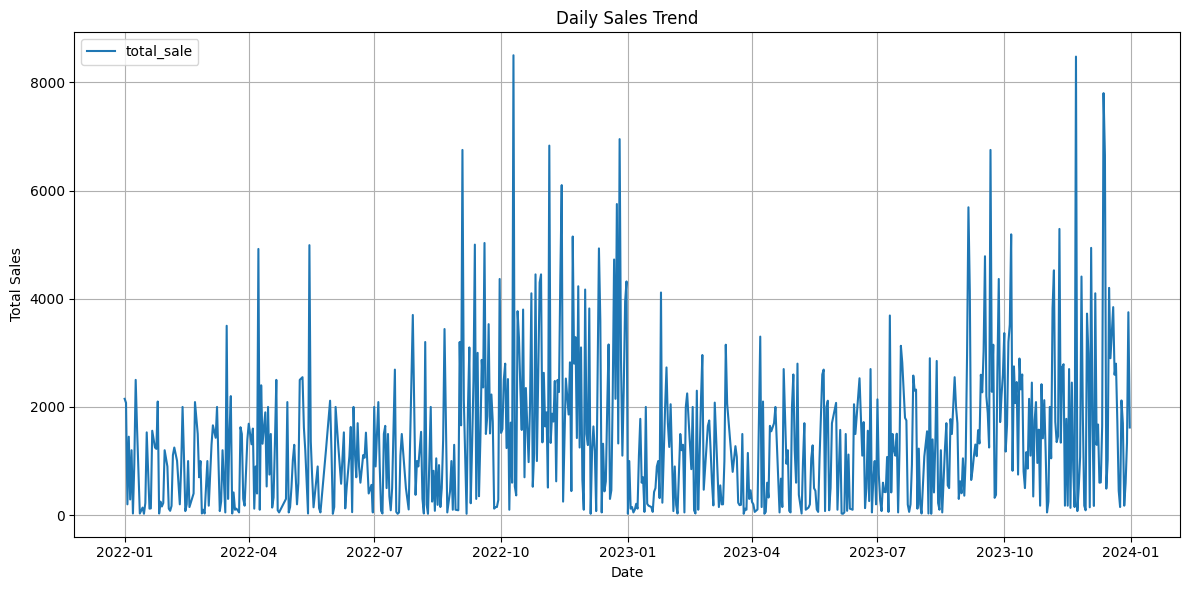

In [21]:
plt.figure(figsize=(12,6))
daily_sales=df.groupby('sale_day')['total_sale'].sum().reset_index()
daily_sales.plot(x='sale_day',y='total_sale',figsize=(12,6))
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

2. Monthly Sales Trends

<Figure size 1000x500 with 0 Axes>

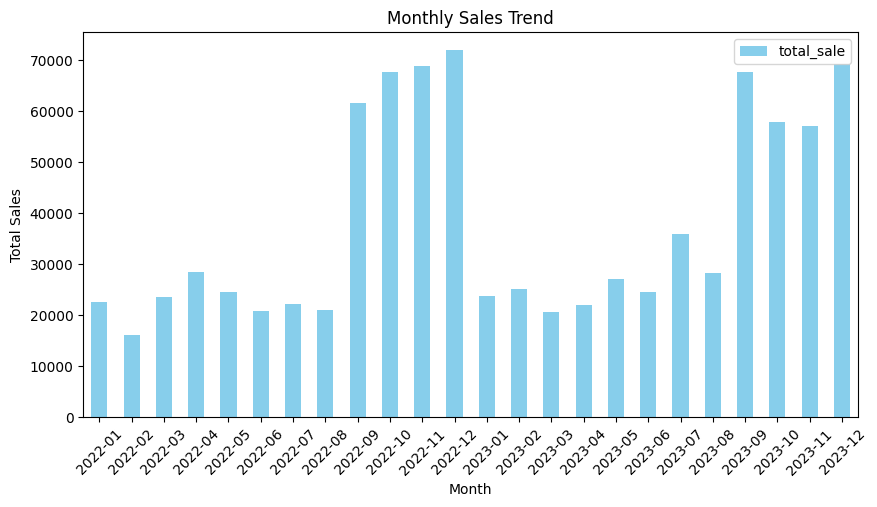

In [48]:
plt.figure(figsize=(10,5))
monthly_sales=df.groupby('sale_month')['total_sale'].sum().reset_index()
monthly_sales.plot(x='sale_month',y='total_sale',kind='bar',color='skyblue',figsize=(10,5))
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


3. Category Sales

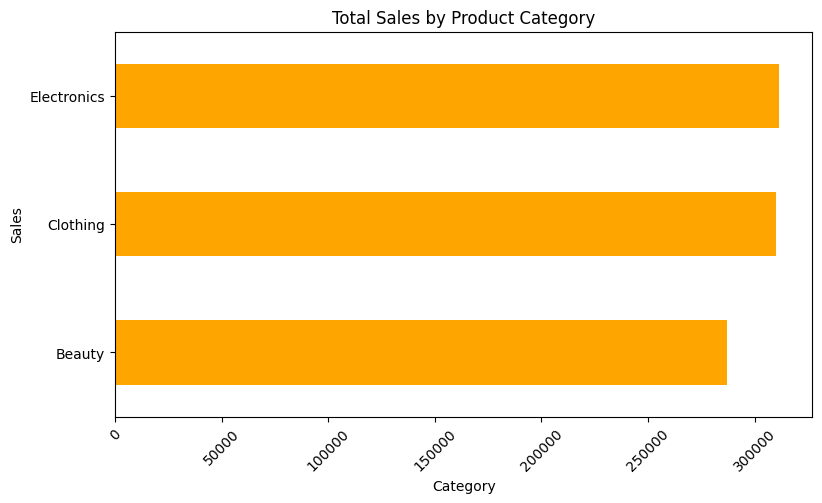

In [ ]:
plt.figure(figsize=(9,5))
Category_sales=df.groupby('category')['total_sale'].sum().sort_values()
Category_sales.plot(kind='barh',color='orange')
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

4. Gender-wise Sales Distribution

C:\Users\sonis\AppData\Local\Temp\ipykernel_19612\3367297661.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='gender',y='total_sale',palette='Set1')


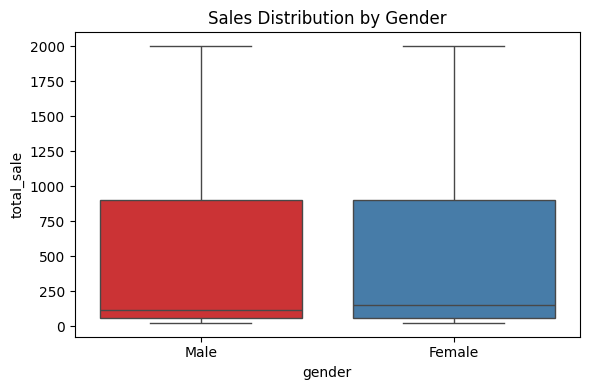

In [39]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df,x='gender',y='total_sale',palette='Set1')
plt.title("Sales Distribution by Gender")
plt.tight_layout()
plt.show()

5. Weekday Sales Pattern

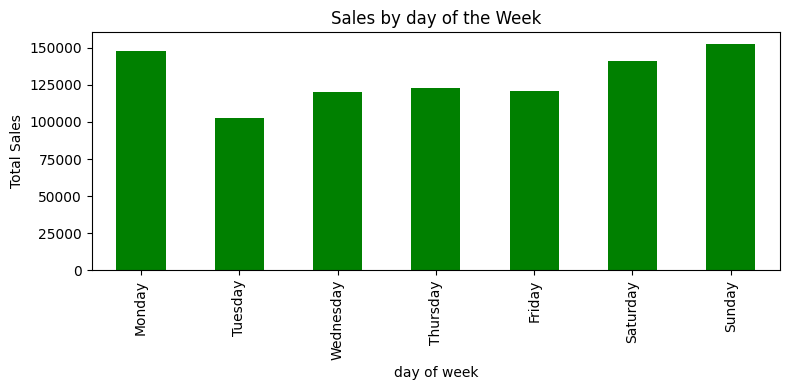

In [43]:
plt.figure(figsize=(8,4))
Weekday_sales=df.groupby('day_of_week')['total_sale'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
Weekday_sales.plot(kind='bar',color='green')
plt.title('Sales by day of the Week')
plt.xlabel('day of week')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


Calculate KPI

In [50]:
Total_sales=df['total_sale'].sum()
revenue_per_category=df.groupby('category')['total_sale'].sum()
aov=df['total_sale'].mean()
print('Total sales: ',Total_sales)
print('Revenue per Category: ',revenue_per_category)
print('Average order value: ',aov)

Total sales:  908230.0
Revenue per Category:  category
Beauty         286790.0
Clothing       309995.0
Electronics    311445.0
Name: total_sale, dtype: float64
Average order value:  457.0860593860091
